# TP1 - IA

In [3]:
import pickle
import os 
# import numpy as np
import random

def read_cifar_batch(batch):
    """
    batch : is a string, path of a single batch
    returns : matrix data, vector labels
    """
    with open(batch, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    # print(dict.keys())
    labels = dict[b'labels']
    data = dict[b'data']
    return(data, labels)

def read_cifar(path):
    """
    parameter : path of directory containing 5 data batches + test batch 
    returns : data, labels
    """
    batches = ["data_batch_1/", "data_batch_2/", "data_batch_3/", "data_batch_4/", "data_batch_5/", "test_batch/"]
    list_data = []
    list_labels = []
    for name in batches:
        file_path = os.path.join(path, name)
        data_i, labels_i = read_cifar_batch(file_path)
        list_data.append(data_i)
        list_labels.append(labels_i)
    data = np.concatenate(list_data)
    labels = np.concatenate(list_labels)
    return data, labels

def split_dataset(data, labels, split):
    nb_im = len(data)
    shuffled = [i for i in range(0, nb_im)]
    np.random.shuffle(shuffled) # liste d'entiers mélangés sans répétition entre 0 et 59 999 : indices des images

    split_index = round(split*nb_im)
    # print(split_index)
    train_index = shuffled[:split_index]
    test_index = shuffled[split_index:]
    data_train = []
    labels_train = []
    for i in train_index:
        data_train.append(data[i])
        labels_train.append(labels[i])
    
    data_test = []
    labels_test = []
    for i in test_index:
        data_test.append(data[i])
        labels_test.append(labels[i])

    data_train = np.array(data_train, dtype=np.float32)
    data_test = np.array(data_test, dtype=np.int64)
    labels_train = np.array(labels_train, dtype=np.float32)
    labels_test = np.array(labels_test)
    
    return(data_train, labels_train, data_test, labels_test)

## k-nearest neighboors

1. Distance function

In [27]:
import numpy as np

def distance_matrix(matrix1, matrix2):
    """
    a, b are two matrices of same dimension
    returns the L2 Euclidian distance matrix
    """
    # matrix1_expanded = np.expand_dims(matrix1, axis=1)
    # matrix2_expanded = np.expand_dims(matrix2, axis=0)

    # Compute element-wise squared differences
    squared_diff = np.sum((matrix1 - matrix2)**2)

    # Compute the L2 Euclidean distance matrix
    dists = np.sqrt(squared_diff)

    return dists

# Example usage:
matrix1 = np.array([[1, 2, 3], [4, 5, 6]])

matrix2 = np.array([[7, 8, 9], [10, 11, 12]])

result = distance_matrix(matrix1, matrix2)
print(result)


14.696938456699069


In [11]:
import matplotlib.pyplot as plt
import numpy as np

def distance_matrix(a, b):
    """
    returns the L2 Euclidian distance matrix
    """
    print(a.shape, b.shape)
    a2 = np.sum(np.square(a), axis=1, keepdims=True) # sum over each line 
    b2 = np.sum(np.square(b), axis=1, keepdims=True)

    dists = np.sqrt(a2 + b2.T - 2 * np.dot(a, b.T))
    return dists

# Select the most frequent one
def democracy(arr):
    """
    majority vote in the labels array 
    returns the most frequent label in the array
    """
    values, count = np.unique(arr, return_counts=True)
    return values[np.argmax(count)]

def knn_predict(dists, labels_train, k):

    nearest_indices = np.argsort(dists.T)[:, :k]
    nearest_labels = [labels_train[i] for i in nearest_indices]
    predictions = np.array([democracy(arr) for arr in nearest_labels])

    return predictions

def evaluate_knn(data_train, labels_train, data_test, labels_test, k):

    dists = distance_matrix(data_train, data_test)      
    prediction = knn_predict(dists, labels_train, k)

    correct = 0
    for pred, test in zip(prediction, labels_test):
        if pred == test:
            correct += 1

    return correct / len(labels_test)


def plot_evaluate_knn(data_train, labels_train, data_test, labels_test):

    dists = distance_matrix(data_train, data_test)
    sorted_dist = np.argsort(dists.T)

    k_list = [i for i in range(1, 21)]
    accuracies = []
    for k in range(1, 21):
        print("\n Evaluating k=%d" % k)
        accuracies.append(evaluate_knn(
            data_train=data_train,
            labels_train=labels_train,
            data_test=data_test,
            labels_test=labels_test,
            k=k
        ))

    plt.title("Variation of the accuracy as a function of k")
    plt.xlabel('k')
    plt.ylabel("Accuracy")
    plt.grid()
    plt.plot(k_list, accuracies, 'o-')
    plt.show()

(54000, 3072) (6000, 3072)

 Evaluating k=1
(54000, 3072) (6000, 3072)

 Evaluating k=2
(54000, 3072) (6000, 3072)

 Evaluating k=3
(54000, 3072) (6000, 3072)

 Evaluating k=4
(54000, 3072) (6000, 3072)

 Evaluating k=5
(54000, 3072) (6000, 3072)

 Evaluating k=6
(54000, 3072) (6000, 3072)

 Evaluating k=7
(54000, 3072) (6000, 3072)

 Evaluating k=8
(54000, 3072) (6000, 3072)

 Evaluating k=9
(54000, 3072) (6000, 3072)

 Evaluating k=10
(54000, 3072) (6000, 3072)

 Evaluating k=11
(54000, 3072) (6000, 3072)

 Evaluating k=12
(54000, 3072) (6000, 3072)

 Evaluating k=13
(54000, 3072) (6000, 3072)

 Evaluating k=14
(54000, 3072) (6000, 3072)

 Evaluating k=15
(54000, 3072) (6000, 3072)

 Evaluating k=16
(54000, 3072) (6000, 3072)

 Evaluating k=17
(54000, 3072) (6000, 3072)

 Evaluating k=18
(54000, 3072) (6000, 3072)

 Evaluating k=19
(54000, 3072) (6000, 3072)

 Evaluating k=20
(54000, 3072) (6000, 3072)


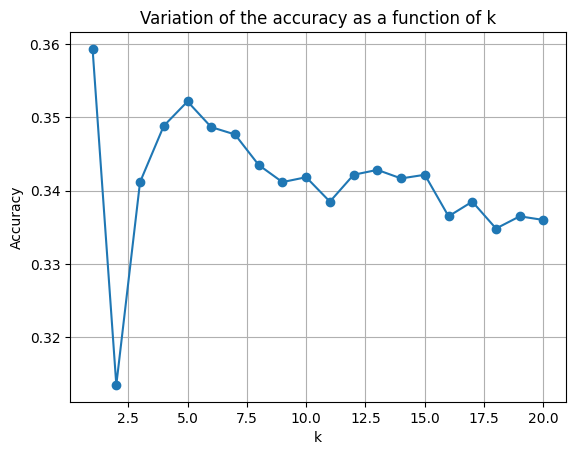

In [12]:
data, labels = read_cifar("./data/cifar-10-batches-py")

split = 0.9
data_train, labels_train, data_test, labels_test = split_dataset(data, labels, split)

plot_evaluate_knn(data_train, labels_train, data_test, labels_test)

In [4]:
matrix1 = np.array([[1, 2, 3], [4, 5, 6]])
print(np.expand_dims(matrix1, axis=0))

[[[1 2 3]
  [4 5 6]]]


2. predict function

In [5]:
def knn_predict(dists, labels_train, k):
    """
    dists : distance matrix between train set and test set
    k : number of labels
    
    returns the predicted labels for the elements of data_test
    """
    # Ensure k is not greater than the number of training samples
    if k > len(labels_train):
        raise ValueError("Number of neighbors (k) cannot be greater than the number of training samples")

    # Get the indices of the k nearest neighbors for each test sample
    indices = np.argsort(dists, axis=1)[:, :k]

    # Get the labels of the k nearest neighbors
    k_nearest_labels = labels_train[indices]

    # For each test sample, find the most common label among its k nearest neighbors
    predicted_labels = np.array([np.argmax(np.bincount(labels)) for labels in k_nearest_labels])

    return predicted_labels

# Example usage:
# Assuming 'dists' is the distance matrix, 'labels_train' is the training labels, and 'k' is the number of neighbors
# 'data_test' is the test data for which you want to predict labels

# predicted_labels = knn_predict(dists, labels_train, k)
# print(predicted_labels)


3. Evaluation function

In [6]:
def evaluate_knn(data_train, labels_train, data_test, labels_test, k):
    """
    returns classification rate (accuracy)
    """
    dists = distance_matrix(data_train, data_test)
    pred_labels = knn_predict(dists, labels_train, k)

    accuracy = sum(pred_labels == labels_test)/len(labels_test)
    return accuracy
    

## Artificial Neural Network

In [7]:
import pickle
import os 
# import numpy as np
import random

def read_cifar_batch(batch):
    """
    batch : is a string, path of a single batch
    returns : matrix data, vector labels
    """
    with open(batch, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    # print(dict.keys())
    labels = dict[b'labels']
    data = dict[b'data']
    return(data, labels)

def read_cifar(path):
    """
    parameter : path of directory containing 5 data batches + test batch 
    returns : data, labels
    """
    batches = ["data_batch_1/", "data_batch_2/", "data_batch_3/", "data_batch_4/", "data_batch_5/", "test_batch/"]
    list_data = []
    list_labels = []
    for name in batches:
        file_path = os.path.join(path, name)
        data_i, labels_i = read_cifar_batch(file_path)
        list_data.append(data_i)
        list_labels.append(labels_i)
    data = np.concatenate(list_data)
    labels = np.concatenate(list_labels)
    return data, labels

def split_dataset(data, labels, split):
    nb_im = len(data)
    shuffled = [i for i in range(0, nb_im)]
    np.random.shuffle(shuffled) # liste d'entiers mélangés sans répétition entre 0 et 59 999 : indices des images

    split_index = round(split*nb_im)
    # print(split_index)
    train_index = shuffled[:split_index]
    test_index = shuffled[split_index:]
    data_train = []
    labels_train = []
    for i in train_index:
        data_train.append(data[i])
        labels_train.append(labels[i])
    
    data_test = []
    labels_test = []
    for i in test_index:
        data_test.append(data[i])
        labels_test.append(labels[i])

    data_train = np.array(data_train, dtype=np.float32)
    data_test = np.array(data_test, dtype=np.int64)
    labels_train = np.array(labels_train, dtype=np.float32)
    labels_test = np.array(labels_test)
    
    return(data_train, labels_train, data_test, labels_test)


if __name__ == "__main__":
    
    path = "D:/ECL/3A/MOD/IA/TD1/mod_4_6-td1-main/data/cifar-10-batches-py/"

    # Test read_cifar_batch
    batch = "D:/ECL/3A/MOD/IA/TD1/mod_4_6-td1-main/data/cifar-10-batches-py/data_batch_1/"
    data, labels = read_cifar_batch(batch)
    print(f"data shape : {np.shape(data)} - labels shape : {np.shape(labels)}")

    # Test read_cifar
    data, labels = read_cifar(path)
    print(f"data shape : {np.shape(data)} - labels shape : {np.shape(labels)}")
    
    # Test split_dataset
    data_train, labels_train, data_test, labels_test = split_dataset(data, labels, 0.75)
    
    print(f"size labels_train : {len(data_train)} - {len(labels_train)}")
    print(f"size labels_test : {len(data_test)} - {len(labels_test)}")
    print(data_train.shape, data_test.shape)

data shape : (10000, 3072) - labels shape : (10000,)
data shape : (60000, 3072) - labels shape : (60000,)
size labels_train : 45000 - 45000
size labels_test : 15000 - 15000
(45000, 3072) (15000, 3072)


In [3]:
N, din = np.shape(data_test)
print(N, din)
print(labels_test.shape)

ValueError: not enough values to unpack (expected 2, got 1)

Example code

In [13]:
import numpy as np

N = 30  # number of input data
d_in = 3  # input dimension
d_h = 3  # number of neurons in the hidden layer
d_out = 2  # output dimension (number of neurons of the output layer)

# Random initialization of the network weights and biaises
w1 = 2 * np.random.rand(d_in, d_h) - 1  # first layer weights
b1 = np.zeros((1, d_h))  # first layer biaises
w2 = 2 * np.random.rand(d_h, d_out) - 1  # second layer weights
b2 = np.zeros((1, d_out))  # second layer biaises

data = np.random.rand(N, d_in)  # create a random data
targets = np.random.rand(N, d_out)  # create a random targets

# Forward pass
a0 = data # the data are the input of the first layer
z1 = np.matmul(a0, w1) + b1  # input of the hidden layer
a1 = 1 / (1 + np.exp(-z1))  # output of the hidden layer (sigmoid activation function)
z2 = np.matmul(a1, w2) + b2  # input of the output layer
a2 = 1 / (1 + np.exp(-z2))  # output of the output layer (sigmoid activation function)
predictions = a2  # the predicted values are the outputs of the output layer

# Compute loss (MSE)
loss = np.mean(np.square(predictions - targets))
print(loss)

[1, 2] [3, 4, 5, 6, 7]


10. Create a Python file named `mlp.py`. Use the above code to write the function `learn_once_mse` taking as parameters:
- `w1`, `b1`, `w2`, `b2` the weights
- `data` a matrix of shape (`batch_size` x `d_in`)
- `targets` a matrix of shape (`batch_size` x `d_out`)
- `learning_rate` the learning rate

performs one gradient descent step by step, and returns :
- `w1`, `b1`, `w2`, `b2` the updated weights and biases
- `loss`, the loss for monitoring purpose


In [31]:
def sigmoid(mat):
    """ 
    Returns the sigmoid of matrix mat
    """
    return 1 / (1 + np.exp(-mat))

def learn_once_mse(w1, b1, w2, b2, data, targets, learning_rate):
    """ 
    performs one learning step and one gradient descent
    returns the updated weights and biases and the loss for monitoring purpose
    """
    batch_size, d_out = np.shape(targets) # data has a shape of (N, d_out)
    # Forward pass
    a0 = data # the data are the input of the input layer
    z1 = np.matmul(a0, w1) + b1  # input of the hidden layer
    a1 = sigmoid(z1) # output of the hidden layer (sigmoid activation function)
    z2 = np.matmul(a1, w2) + b2  # input of the output layer
    a2 = sigmoid(z2)  # output of the output layer (sigmoid activation function)
    predictions = a2  # the predicted values are the outputs of the output layer

    # Compute loss (MSE)
    loss = np.mean(np.square(predictions - targets))    

    # Error backpropagation
    dc_da2 = 2/(batch_size*d_out) * (a2 - targets)          # dim : N x d_out
    dc_dz2 = dc_da2 * a2 * (1 - a2)                # dim : N x d_out
    a1t = np.transpose(a1)                         # dim : d_h x N
    dc_dw2 = np.matmul(a1t, dc_dz2)                # dim : d_h x d_out
    dc_db2 = np.sum(dc_dz2, axis=0)                # dim : 1 x d_h ; line vector containing the sum of all the values over a line
    w2t = np.transpose(w2)                         # dim : d_out x d_h
    dc_da1 = np.matmul(dc_dz2, w2t)                # dim : N x d_h
    dc_dz1 = dc_da1 * a1 * (1 - a1)                # dim : N x d_h
    a0t = np.transpose(a0)                         # dim : d_in x N
    dc_dw1 = np.matmul(a0t, dc_dz1)                # dim : d_in x d_h 
    dc_db1 = np.sum(dc_dz1, axis=0)                # dim :  1 x d_in

    # Parameter update
    w1 = w1 - learning_rate * dc_dw1
    b1 = b1 - learning_rate * dc_db1
    w2 = w2 - learning_rate * dc_dw2
    b2 = b2 - learning_rate * dc_db2    

    return (w1, b1, w2, b2, loss)

In [4]:
import numpy as np

a = np.array([[1,2,3], [3,4,5]])
print(a)
print(np.sum(a, axis = 0))

[[1 2 3]
 [3 4 5]]
[4 6 8]


11. Write the function `one_hot`  taking a (n)-D array as parameters and returning the corresponding (n+1)-D one-hot matrix.

In [14]:
import numpy as np
# number of classes is d_out
def one_hot(m):
    res = [[1 if m[i]==j else 0 for j in range(np.max(m)+1)] for i in range(len(m))]
    res = np.array(res)
    return res


In [15]:
vect = np.array([1,2,0])
print(vect)
print(one_hot(vect))

[1 2 0]
[[0 1 0]
 [0 0 1]
 [1 0 0]]


12. Write the function `learn_once_cross_entropy`.

In [33]:
arr = np.array([[1,2,3],[1,2,3]])
print(arr)
print(np.sum(arr, axis=1, keepdims=True))

[[1 2 3]
 [1 2 3]]
[[6]
 [6]]


In [44]:
def softmax(z):
    exp_z = np.exp(z)
    sum_lines = np.sum(exp_z, axis=1, keepdims=True) # sum of values line by line
    return exp_z / sum_lines

def learn_once_cross_entropy(w1, b1, w2, b2, data, labels_train, learning_rate) :
    """
    performs one learning step and one gradient descent step
    returns the updated weights and biases and the loss for monitoring purpose
    """
    # one_hot vector encoding the label
    y = one_hot(labels_train) 

    # Forward pass
    a0 = data # the data are the input of the first layer
    z1 = np.matmul(a0, w1) + b1  # input of the hidden layer
    a1 = sigmoid(z1)  # output of the hidden layer (sigmoid activation function)
    z2 = np.matmul(a1, w2) + b2  # input of the output layer
    a2 = softmax(z2) # output of the output layer (softmax activation function)
    
    # Compute loss : cross-entropy loss 
    loss = -np.mean(y*np.log(a2))  

    # Error backpropagation
    dc_dz2 = a2 - targets                          # dim : N x d_out
    # all the other gradients do not change
    a1t = np.transpose(a1)                         # dim : d_h x N
    dc_dw2 = np.matmul(a1t, dc_dz2)                # dim : d_h x d_out
    dc_db2 = np.sum(dc_dz2, axis=0)                # dim : 1 x d_h ; line vector containing the sum of all the values over a line
    w2t = np.transpose(w2)                         # dim : d_out x d_h
    dc_da1 = np.matmul(dc_dz2, w2t)                # dim : N x d_h
    dc_dz1 = dc_da1 * a1 * (1 - a1)                # dim : N x d_h
    a0t = np.transpose(a0)                         # dim : d_in x N
    dc_dw1 = np.matmul(a0t, dc_dz1)                # dim : d_in x d_h 
    dc_db1 = np.sum(dc_dz1, axis=0)                # dim :  1 x d_in

    # Parameter update
    w1 = w1 - learning_rate * dc_dw1
    b1 = b1 - learning_rate * dc_db1
    w2 = w2 - learning_rate * dc_dw2
    b2 = b2 - learning_rate * dc_db2

    # accuracy calculation
    true_predictions = np.sum(labels_train == predictions_vect) # true prediction means the prediction is equal to the target
    total_predictions = np.shape(labels_test)[0] # number of input data in the batch i.e. number of lines of the labels_train matrix i.e. first dimension of the matrix
    accuracy = true_predictions/total_predictions
    
    # return the accuracy for the training function
    return w1, b1, w2, b2, loss, accuracy


13. Write the function `train_mlp`

In [35]:
def train_mlp(w1, b1, w2, b2, data_train, labels_train, learning_rate, num_epoch):
    """
    performs num_epoch of training steps
    returns final weights and biases
    and returns train_accuracies : list of train accuracies accross epochs, list of floats
    """
    train_accuracies = []
    for epoch in range(num_epoch):
        print(f"epoch : {epoch}")
        # one training step
        w1, b1, w2, b2, loss, accuracy = learn_once_cross_entropy(w1, b1, w2, b2, data_train, labels_train, learning_rate)
        print(f"loss : {loss}\naccuracy : {accuracy}\n")
        train_accuracies.append(accuracy)
         
    return w1, b1, w2, b2, train_accuracies

14. Write the function `test_mlp`

In [40]:
m = np.array([[1,2],[3,4],[5,6]])
print(m)
predictions = np.argmax(m, axis=1)
print(predictions)


[[1 2]
 [3 4]
 [5 6]]
[1 1 1]


In [36]:
# the network is already trained

def test_mlp(w1, b1, w2, b2, data_test, labels_test):
    """
    Only forward pass
    Returns the test accuracy
    """
    # code similar to the learn_once_cross_entropy function, but no gradient descent
    # one_hot vector encoding the label
    y = one_hot(labels_test) 

    # Forward pass
    a0 = data_test # the data are the input of the first layer
    z1 = np.matmul(a0, w1) + b1  # input of the hidden layer
    a1 = sigmoid(z1)  # output of the hidden layer (sigmoid activation function)
    z2 = np.matmul(a1, w2) + b2  # input of the output layer
    a2 = softmax(z2) # output of the output layer (softmax activation function)    
    
    # accuracy 
    predictions = np.argmax(a2, axis=1) # returns index of the max of each line, returns a line vector
    true_predictions = np.sum(labels_test == predictions)
    total_predictions = labels_test.shape[0]
    test_accuracy = true_predictions/total_predictions
    
    return test_accuracy

15. Write the function `run_mlp_training`

In [37]:
def run_mlp_training(data_train, labels_train, data_test, labels_test, d_h, learning_rate, num_epoch):

    N, d_in = np.shape(data_train)  # input dimension
    d_out = np.shape(labels_test)[0]  # output dimension (number of neurons of the output layer)

    # Random initialization of the network weights and biaises
    w1 = 2 * np.random.rand(d_in, d_h) - 1  # first layer weights
    b1 = np.zeros((1, d_h))  # first layer biaises
    w2 = 2 * np.random.rand(d_h, d_out) - 1  # second layer weights
    b2 = np.zeros((1, d_out))  # second layer biaises

    # Training
    w1, b1, w2, b2, train_accuracies = train_mlp(w1, b1, w2, b2, data_train, labels_train, learning_rate, num_epoch)

    # Testing
    test_accuracy = test_mlp(w1, b1, w2, b2, data_test, labels_test)

    return train_accuracies, test_accuracy

16. For `split_factor=0.9`, `d_h=64`, `learning_rate=0.1` and `num_epoch=100`, plot the evolution of learning accuracy across learning epochs

In [43]:
y = one_hot(labels_test)
print(np.shape(y))

(6000, 10)


In [40]:
import matplotlib.pyplot as plt

path = "D:/ECL/3A/MOD/IA/TD1/mod_4_6-td1-main/data/cifar-10-batches-py/"
# Test read_cifar
data, labels = read_cifar(path) # read the whole dataset

data_train, labels_train, data_test, labels_test = split_dataset(data, labels, 0.9)
train_accuracies, test_accuracy = run_mlp_training(data_train, labels_train, data_test, labels_test, d_h=64, learning_rate=0.1, num_epoch=100)


epoch : 0


C:\Users\basil\AppData\Local\Temp\ipykernel_11020\516218375.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-mat))


ValueError: operands could not be broadcast together with shapes (54000,10) (54000,) 